In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [21]:
train_X = pd.read_excel('train_x_data.xlsx')
train_y = pd.read_excel('train_y_data.xlsx')
test_X = pd.read_excel('test_x_data.xlsx')
test_y = pd.read_excel('test_y_data.xlsx')

train_X

,Commodity,Date,Close,Commodity.1,Date.1,Close.1,Commodity.2,Date.2,Close.2,Commodity.3,...,Close.13,Commodity.14,Date.14,Close.14,Commodity.15,Date.15,Close.15,Commodity.16,Date.16,Close.16
0,Cocoa,2018-01-02,1936,Coffee,2018-01-02,130.199997,Cotton,2018-01-02,77.500000,Sugar,...,3.056,Feeder Cattle,2018-01-02,149.524994,Lean Hogs,2018-01-02,70.724998,Live Cattle,2018-01-02,123.349998
1,Cocoa,2018-01-03,1907,Coffee,2018-01-03,128.600006,Cotton,2018-01-03,78.110001,Sugar,...,3.008,Feeder Cattle,2018-01-03,149.375000,Lean Hogs,2018-01-03,71.050003,Live Cattle,2018-01-03,122.949997
2,Cocoa,2018-01-04,1905,Coffee,2018-01-04,129.550003,Cotton,2018-01-04,79.250000,Sugar,...,2.880,Feeder Cattle,2018-01-04,149.024994,Lean Hogs,2018-01-04,71.375000,Live Cattle,2018-01-04,122.250000
3,Cocoa,2018-01-05,1895,Coffee,2018-01-05,128.449997,Cotton,2018-01-05,78.010002,Sugar,...,2.795,Feeder Cattle,2018-01-05,146.625000,Lean Hogs,2018-01-05,71.425003,Live Cattle,2018-01-05,119.250000
4,Cocoa,2018-01-08,1914,Coffee,2018-01-08,125.150002,Cotton,2018-01-08,78.139999,Sugar,...,2.835,Feeder Cattle,2018-01-08,146.449997,Lean Hogs,2018-01-08,72.974998,Live Cattle,2018-01-08,117.224998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1342,Cocoa,2023-06-26,3206,Coffee,2023-06-26,167.949997,Cotton,2023-06-26,77.070000,Sugar,...,2.791,Feeder Cattle,2023-06-26,233.675003,Lean Hogs,2023-06-26,93.400002,Live Cattle,2023-06-26,177.699997
1343,Cocoa,2023-06-27,3212,Coffee,2023-06-27,169.449997,Cotton,2023-06-27,77.639999,Sugar,...,2.763,Feeder Cattle,2023-06-27,238.500000,Lean Hogs,2023-06-27,94.125000,Live Cattle,2023-06-27,179.300003
1344,Cocoa,2023-06-28,3292,Coffee,2023-06-28,165.649994,Cotton,2023-06-28,80.120003,Sugar,...,2.603,Feeder Cattle,2023-06-28,240.250000,Lean Hogs,2023-06-28,94.275002,Live Cattle,2023-06-28,179.625000
1345,Cocoa,2023-06-29,3218,Coffee,2023-06-29,163.600006,Cotton,2023-06-29,81.250000,Sugar,...,2.701,Feeder Cattle,2023-06-29,242.375000,Lean Hogs,2023-06-29,95.449997,Live Cattle,2023-06-29,179.750000


In [22]:
# 결측치 확인
print(train_X.isnull().sum())
print(train_y.isnull().sum())
print(test_X.isnull().sum())
print(test_y.isnull().sum())

Commodity       0
Date            0
Close           0
Commodity.1     0
Date.1          0
Close.1         0
Commodity.2     0
Date.2          0
Close.2         0
Commodity.3     0
Date.3          0
Close.3         0
Commodity.4     0
Date.4          0
Close.4         0
Commodity.5     0
Date.5          0
Close.5         0
Commodity.6     0
Date.6          0
Close.6         0
Commodity.7     0
Date.7          0
Close.7         0
Commodity.8     0
Date.8          0
Close.8         0
Commodity.9     0
Date.9          0
Close.9         0
Commodity.10    0
Date.10         0
Close.10        0
Commodity.11    0
Date.11         0
Close.11        0
Commodity.12    0
Date.12         0
Close.12        0
Commodity.13    0
Date.13         0
Close.13        0
Commodity.14    0
Date.14         0
Close.14        0
Commodity.15    0
Date.15         0
Close.15        0
Commodity.16    0
Date.16         0
Close.16        0
dtype: int64
Commodity    0
Date         0
Close        0
dtype: int64
Commodity  

In [23]:
# 3개 단위로 나누기 (예: 'Commodity', 'Date', 'Close')
grouped_train_X_cols = [train_X.columns[i:i+3] for i in range(0, len(train_X.columns), 3)]
grouped_test_X_cols = [test_X.columns[i:i+3] for i in range(0, len(test_X.columns), 3)]
grouped_train_y_cols = [train_y.columns[i:i+3] for i in range(0, len(train_y.columns), 3)]
grouped_test_y_cols = [test_y.columns[i:i+3] for i in range(0, len(test_y.columns), 3)]
grouped_train_X_cols

[Index(['Commodity', 'Date', 'Close'], dtype='object'),
 Index(['Commodity.1', 'Date.1', 'Close.1'], dtype='object'),
 Index(['Commodity.2', 'Date.2', 'Close.2'], dtype='object'),
 Index(['Commodity.3', 'Date.3', 'Close.3'], dtype='object'),
 Index(['Commodity.4', 'Date.4', 'Close.4'], dtype='object'),
 Index(['Commodity.5', 'Date.5', 'Close.5'], dtype='object'),
 Index(['Commodity.6', 'Date.6', 'Close.6'], dtype='object'),
 Index(['Commodity.7', 'Date.7', 'Close.7'], dtype='object'),
 Index(['Commodity.8', 'Date.8', 'Close.8'], dtype='object'),
 Index(['Commodity.9', 'Date.9', 'Close.9'], dtype='object'),
 Index(['Commodity.10', 'Date.10', 'Close.10'], dtype='object'),
 Index(['Commodity.11', 'Date.11', 'Close.11'], dtype='object'),
 Index(['Commodity.12', 'Date.12', 'Close.12'], dtype='object'),
 Index(['Commodity.13', 'Date.13', 'Close.13'], dtype='object'),
 Index(['Commodity.14', 'Date.14', 'Close.14'], dtype='object'),
 Index(['Commodity.15', 'Date.15', 'Close.15'], dtype='object

In [24]:
# Long Format으로 변환
long_train_X_data = []
long_test_X_data = []

for group in grouped_train_X_cols:
    temp = train_X[group]
    temp.columns = ['Commodity', 'Date', 'Close']  # 열 이름을 통일
    long_train_X_data.append(temp)

# 모든 그룹을 하나로 합치기
long_train_X = pd.concat(long_train_X_data, ignore_index=True)

for group in grouped_test_X_cols:
    temp = test_X[group]
    temp.columns = ['Commodity', 'Date', 'Close']  # 열 이름을 통일
    long_test_X_data.append(temp)

# 모든 그룹을 하나로 합치기
long_test_X = pd.concat(long_test_X_data, ignore_index=True)

# 결과 확인
long_train_X.head()


,Commodity,Date,Close
0,Cocoa,2018-01-02,1936.0
1,Cocoa,2018-01-03,1907.0
2,Cocoa,2018-01-04,1905.0
3,Cocoa,2018-01-05,1895.0
4,Cocoa,2018-01-08,1914.0


In [25]:
# Long Format으로 변환
long_train_y_data = []
long_test_y_data = []

for group in grouped_train_y_cols:
    temp = train_y[group]
    temp.columns = ['Commodity', 'Date', 'Close']  # 열 이름을 통일
    long_train_y_data.append(temp)

# 모든 그룹을 하나로 합치기
long_train_y = pd.concat(long_train_y_data, ignore_index=True)

for group in grouped_test_y_cols:
    temp = test_y[group]
    temp.columns = ['Commodity', 'Date', 'Close']  # 열 이름을 통일
    long_test_y_data.append(temp)

# 모든 그룹을 하나로 합치기
long_test_y = pd.concat(long_test_y_data, ignore_index=True)

# 결과 확인
long_train_y.head()

,Commodity,Date,Close
0,Brent Crude Oil,2018-01-02,66.570000
1,Brent Crude Oil,2018-01-03,67.839996
2,Brent Crude Oil,2018-01-04,68.070000
3,Brent Crude Oil,2018-01-05,67.620003
4,Brent Crude Oil,2018-01-08,67.779999


In [26]:
# 날짜 형식 변환
long_train_X['Date'] = pd.to_datetime(long_train_X['Date'])
long_test_X['Date'] = pd.to_datetime(long_test_X['Date'])
long_train_y['Date'] = pd.to_datetime(long_train_y['Date'])
long_test_y['Date'] = pd.to_datetime(long_test_y['Date'])

# 중복 제거
long_train_X = long_train_X.drop_duplicates()
long_test_X = long_test_X.drop_duplicates()
long_train_y = long_train_y.drop_duplicates()
long_test_y = long_test_y.drop_duplicates()

# 결과 확인
long_train_X

,Commodity,Date,Close
0,Cocoa,2018-01-02,1936.000000
1,Cocoa,2018-01-03,1907.000000
2,Cocoa,2018-01-04,1905.000000
3,Cocoa,2018-01-05,1895.000000
4,Cocoa,2018-01-08,1914.000000
...,...,...,...
22894,Live Cattle,2023-06-26,177.699997
22895,Live Cattle,2023-06-27,179.300003
22896,Live Cattle,2023-06-28,179.625000
22897,Live Cattle,2023-06-29,179.750000


In [27]:
# Date 기준 정렬
long_train_X = long_train_X.sort_values(by='Date')
long_test_X = long_train_X.sort_values(by='Date')
long_train_y = long_train_y.sort_values(by='Date')
long_test_y = long_train_y.sort_values(by='Date')

# 결과 확인
long_train_X

,Commodity,Date,Close
0,Cocoa,2018-01-02,1936.000000
16164,Silver,2018-01-02,17.121000
21552,Live Cattle,2018-01-02,123.349998
1347,Coffee,2018-01-02,130.199997
2694,Cotton,2018-01-02,77.500000
...,...,...,...
2693,Coffee,2023-06-30,161.000000
20204,Feeder Cattle,2023-06-30,247.574997
21551,Lean Hogs,2023-06-30,95.650002
8081,Rough Rice,2023-06-30,1805.500000


In [28]:
# Date를 인덱스로 설정하고 Pivot
pivot_train_X = long_train_X.pivot(index='Date', columns='Commodity', values='Close')
pivot_test_X = long_test_X.pivot(index='Date', columns='Commodity', values='Close')
pivot_train_y = long_train_y.pivot(index='Date', columns='Commodity', values='Close')
pivot_test_y = long_test_y.pivot(index='Date', columns='Commodity', values='Close')

# MultiIndex 제거
pivot_train_X.columns.name = None
pivot_train_X = pivot_train_X.reset_index()
pivot_train_y.columns.name = None
pivot_train_y = pivot_train_y.reset_index()
pivot_test_X.columns.name = None
pivot_test_X = pivot_test_X.reset_index()
pivot_test_y.columns.name = None
pivot_test_y = pivot_test_y.reset_index()

# 결과 확인
pivot_train_X.head()

,Date,Cocoa,Coffee,Copper,Cotton,Feeder Cattle,Gold,Kansas Wheat,Lean Hogs,Live Cattle,Natural Gas,Oats,Palladium,Platinum,Rough Rice,Silver,Soybeans,Sugar
0,2018-01-02,1936.0,130.199997,3.2560,77.500000,149.524994,1313.699951,434.75,70.724998,123.349998,3.056,242.50,1090.000000,943.799988,1153.5,17.121000,955.00,15.33
1,2018-01-03,1907.0,128.600006,3.2370,78.110001,149.375000,1316.199951,441.00,71.050003,122.949997,3.008,244.50,1086.000000,957.799988,1141.0,17.184999,959.75,15.31
2,2018-01-04,1905.0,129.550003,3.2425,79.250000,149.024994,1319.400024,439.75,71.375000,122.250000,2.880,245.75,1097.400024,966.099976,1147.5,17.188999,959.25,15.25
3,2018-01-05,1895.0,128.449997,3.2070,78.010002,146.625000,1320.300049,437.50,71.425003,119.250000,2.795,248.50,1084.849976,971.200012,1156.5,17.205000,961.50,15.08
4,2018-01-08,1914.0,125.150002,3.2010,78.139999,146.449997,1318.599976,433.25,72.974998,117.224998,2.835,250.00,1098.550049,972.299988,1164.5,17.063999,958.25,14.78


In [29]:
print(pivot_train_X.columns)
print(pivot_test_X.columns)
print(pivot_train_y.columns)
print(pivot_test_y.columns)
pivot_train_y.head()

Index(['Date', 'Cocoa', 'Coffee', 'Copper', 'Cotton', 'Feeder Cattle', 'Gold',
       'Kansas Wheat', 'Lean Hogs', 'Live Cattle', 'Natural Gas', 'Oats',
       'Palladium', 'Platinum', 'Rough Rice', 'Silver', 'Soybeans', 'Sugar'],
      dtype='object')
Index(['Date', 'Cocoa', 'Coffee', 'Copper', 'Cotton', 'Feeder Cattle', 'Gold',
       'Kansas Wheat', 'Lean Hogs', 'Live Cattle', 'Natural Gas', 'Oats',
       'Palladium', 'Platinum', 'Rough Rice', 'Silver', 'Soybeans', 'Sugar'],
      dtype='object')
Index(['Date', 'Brent Crude Oil'], dtype='object')
Index(['Date', 'Brent Crude Oil'], dtype='object')


,Date,Brent Crude Oil
0,2018-01-02,66.570000
1,2018-01-03,67.839996
2,2018-01-04,68.070000
3,2018-01-05,67.620003
4,2018-01-08,67.779999


In [30]:
pivot_test_X.reset_index(inplace=True)
pivot_train_X.reset_index(inplace=True)
pivot_test_y.reset_index(inplace=True)
pivot_train_y.reset_index(inplace=True)

pivot_train_X.drop('Date',axis=1, inplace=True)
pivot_test_X.drop('Date',axis=1, inplace=True)
pivot_train_y.drop('Date',axis=1, inplace=True)
pivot_test_y.drop('Date',axis=1, inplace=True)

pivot_train_y.head()

,index,Brent Crude Oil
0,0,66.570000
1,1,67.839996
2,2,68.070000
3,3,67.620003
4,4,67.779999


In [31]:
# 'index' 열 삭제
pivot_train_X.drop('index', axis=1, inplace=True)
pivot_test_X.drop('index', axis=1, inplace=True)
pivot_train_y.drop('index', axis=1, inplace=True)
pivot_test_y.drop('index', axis=1, inplace=True)

# 결과 확인
pivot_train_y.head()

,Brent Crude Oil
0,66.570000
1,67.839996
2,68.070000
3,67.620003
4,67.779999


In [32]:
from sklearn.preprocessing import StandardScaler

# StandardScaler 객체 생성
scaler = StandardScaler()

# 데이터 표준화
pivot_train_X_scaled = scaler.fit_transform(pivot_train_X)
pivot_test_X_scaled = scaler.transform(pivot_test_X)
pivot_train_y_scaled = scaler.fit_transform(pivot_train_y)
pivot_test_y_scaled = scaler.transform(pivot_test_y)

# 표준화된 결과 확인
print(pivot_train_X_scaled[:5])  # 첫 5개 행 출력

[[-2.27881345 -0.31896259 -0.19448044 -0.30428429 -0.19937907 -1.28457483
  -0.95273171 -0.350508   -0.05303156 -0.25792155 -0.90395425 -1.35633492
   0.00694284 -0.89151216 -0.72490451 -0.74203782 -0.065912  ]
 [-2.40155207 -0.35243856 -0.22114479 -0.27476546 -0.20632476 -1.27468632
  -0.92318337 -0.33254535 -0.07342589 -0.28513215 -0.89014585 -1.36385248
   0.13323774 -0.9435787  -0.70979497 -0.72563201 -0.07108287]
 [-2.4100168  -0.33256215 -0.21342607 -0.21959921 -0.22253229 -1.26202873
  -0.92909304 -0.31458312 -0.10911567 -0.35769349 -0.8815156  -1.34242738
   0.20811247 -0.9165041  -0.70885068 -0.72735893 -0.08659597]
 [-2.45234046 -0.35557715 -0.26324623 -0.27960453 -0.33366747 -1.25846876
  -0.93973044 -0.31181951 -0.26207253 -0.40587886 -0.86252905 -1.36601383
   0.25412023 -0.87901619 -0.70507307 -0.71958776 -0.13054947]
 [-2.3719255  -0.42462164 -0.27166659 -0.27331378 -0.34177124 -1.26519324
  -0.95982332 -0.22615294 -0.36531849 -0.38320342 -0.85217275 -1.34026604
   0.264

## 윈도우 크기 결정

In [33]:
def create_windows(X, y, window_size):
    X_windows, y_windows = [], []
    for i in range(len(X) - window_size):
        X_windows.append(X[i:i + window_size])  # .iloc 대신 기본 인덱싱 사용
        y_windows.append(y[i + window_size])    # .iloc 대신 기본 인덱싱 사용
    return np.array(X_windows), np.array(y_windows)

In [34]:
# 윈도우 크기
window_size = 50

# Train 데이터 슬라이싱
X_train, y_train = create_windows(
    pivot_train_X_scaled,  
    pivot_train_y_scaled,  
    window_size
)

# Test 데이터 슬라이싱
X_test, y_test = create_windows(
    pivot_test_X_scaled,  
    pivot_test_y_scaled,  
    window_size
)

# 결과 확인
print(f"Train X Shape: {X_train.shape}, Train y Shape: {y_train.shape}")
print(f"Test X Shape: {X_test.shape}, Test y Shape: {y_test.shape}")

Train X Shape: (1297, 50, 17), Train y Shape: (1297, 1)
Test X Shape: (1297, 50, 17), Test y Shape: (1297, 1)


In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras import backend as K

# RMSE 정의
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

# LSTM 모델 정의
model = Sequential([
    LSTM(64, activation='relu', input_shape=(window_size, X_train.shape[2]), return_sequences=True),
    Dropout(0.2),
    LSTM(64, activation='relu'),
    Dropout(0.2),
    Dense(y_train.shape[1])  # 타겟 변수 개수 (예: 1개면 Dense(1))
])

# 모델 컴파일 (loss에 rmse 사용)
model.compile(optimizer='adam', loss='mse', metrics=[rmse, 'mae'])

In [36]:
# 모델 학습
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,  # 에포크 조정
    batch_size=128,  # 배치 크기 조정
    verbose=1
)

Epoch 1/100
11/11 [==============================] - 3s 113ms/step - loss: 0.6071 - rmse: 0.7165 - mae: 0.5809 - val_loss: 0.1874 - val_rmse: 0.3979 - val_mae: 0.3312
Epoch 2/100
11/11 [==============================] - 1s 77ms/step - loss: 0.1768 - rmse: 0.4064 - mae: 0.3232 - val_loss: 0.1008 - val_rmse: 0.2940 - val_mae: 0.2383
Epoch 3/100
11/11 [==============================] - 1s 75ms/step - loss: 0.1166 - rmse: 0.3443 - mae: 0.2529 - val_loss: 0.0696 - val_rmse: 0.2384 - val_mae: 0.1948
Epoch 4/100
11/11 [==============================] - 1s 75ms/step - loss: 0.0938 - rmse: 0.3030 - mae: 0.2273 - val_loss: 0.0537 - val_rmse: 0.2098 - val_mae: 0.1764
Epoch 5/100
11/11 [==============================] - 1s 76ms/step - loss: 0.0790 - rmse: 0.2719 - mae: 0.2158 - val_loss: 0.0446 - val_rmse: 0.1923 - val_mae: 0.1632
Epoch 6/100
11/11 [==============================] - 1s 74ms/step - loss: 0.0665 - rmse: 0.2544 - mae: 0.1940 - val_loss: 0.0471 - val_rmse: 0.1952 - val_mae: 0.1622
Epo

In [37]:
# 모델 평가
loss, rmse, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss}, Test RMSE: {rmse}, Test MAE: {mae}")

Test Loss: 0.012120119296014309, Test RMSE: 0.09793039411306381, Test MAE: 0.07864199578762054


41/41 [==============================] - 1s 13ms/step


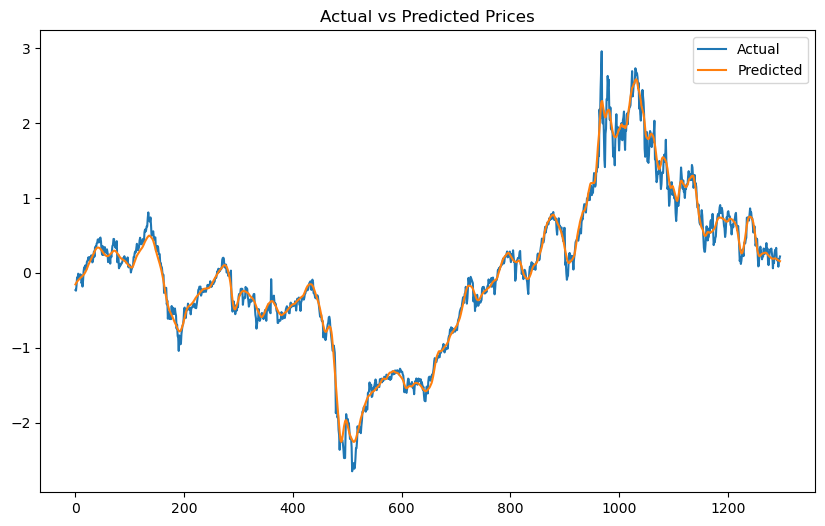

In [38]:
# 예측
y_pred = model.predict(X_test)

# 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title('Actual vs Predicted Prices')
plt.show()